In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm
from statsmodels.stats import weightstats  as stests
import statsmodels.api as sm
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import kruskal
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
from scipy.stats import pearsonr,spearmanr
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")



In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv
To: /content/bike_sharing.csv
100% 648k/648k [00:00<00:00, 13.5MB/s]


In [ ]:
df=pd.read_csv('bike_sharing.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df.shape

(10886, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
for col in df:
  print(df[col].value_counts(),'\n-----------------------------------\n')

datetime
2011-01-01 00:00:00    1
2012-05-01 21:00:00    1
2012-05-01 13:00:00    1
2012-05-01 14:00:00    1
2012-05-01 15:00:00    1
                      ..
2011-09-02 04:00:00    1
2011-09-02 05:00:00    1
2011-09-02 06:00:00    1
2011-09-02 07:00:00    1
2012-12-19 23:00:00    1
Name: count, Length: 10886, dtype: int64 
-----------------------------------

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64 
-----------------------------------

holiday
0    10575
1      311
Name: count, dtype: int64 
-----------------------------------

workingday
1    7412
0    3474
Name: count, dtype: int64 
-----------------------------------

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64 
-----------------------------------

temp
14.76    467
26.24    453
28.70    427
13.94    413
18.86    406
22.14    403
25.42    403
16.40    400
22.96    395
27.06    394
24.60    390
12.30    385
21.32    362
17.22    356
13.12    356
29.52    353
10.66    332

In [ ]:
df.isnull().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


No Null values

<Axes: xlabel='count'>

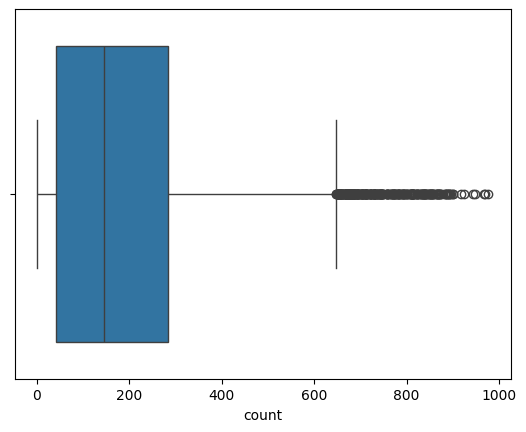

In [ ]:
# Check for outliers in counts column (continuous variable)
sns.boxplot(x=df['count'])

In [ ]:
#number of outliers

def count_outliers(df,column):
  q1=df[column].quantile(0.25)
  q3=df[column].quantile(0.75)
  iqr=q3-q1
  lower_bound=q1-1.5*iqr
  upper_bound=q3+1.5*iqr
  return len((df[column]<lower_bound) | (df[column]>upper_bound))

print(count_outliers(df,'count'))

10886


# Visual Analysis (Univariate and Bivariate)

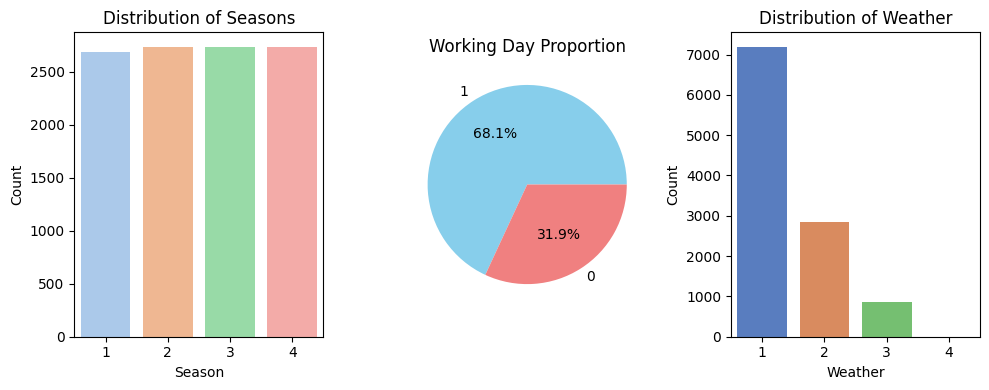

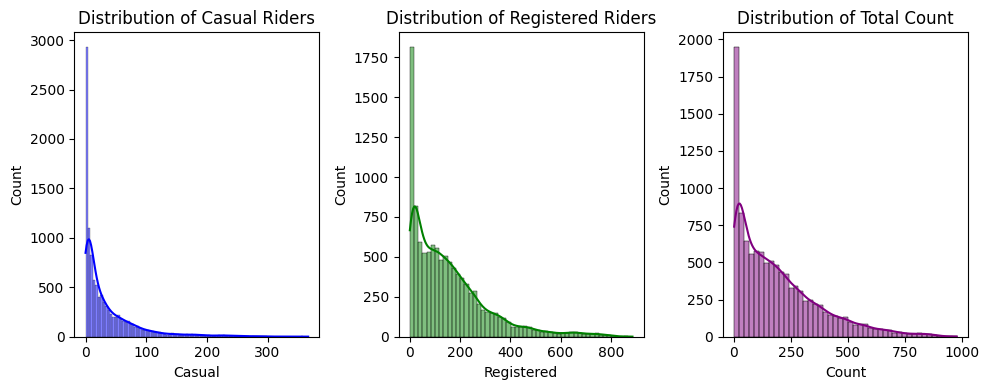

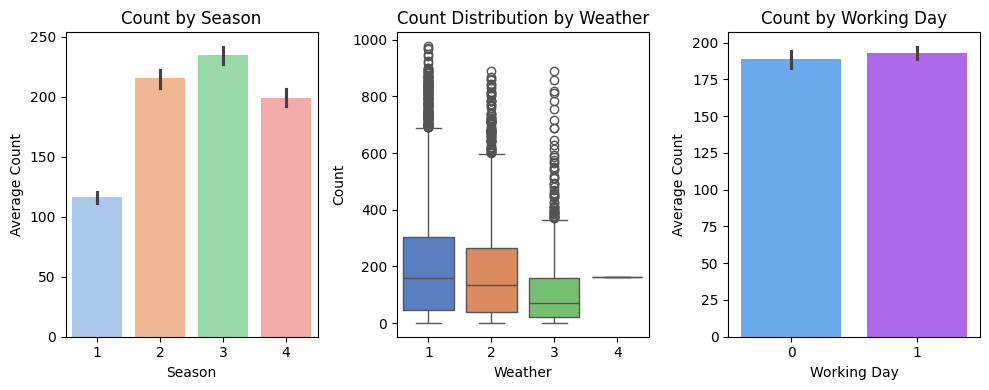

In [ ]:
# Univariate Analysis: Distribution of Categorical Variables
fig, axes = plt.subplots(1, 3, figsize=(10, 4))

# Season Distribution
sns.countplot(x='season', data=df, ax=axes[0], palette='pastel')
axes[0].set_title('Distribution of Seasons')
axes[0].set_xlabel('Season')
axes[0].set_ylabel('Count')

# Working Day Distribution
df['workingday'].value_counts().plot.pie(
    autopct='%1.1f%%', ax=axes[1], colors=['skyblue', 'lightcoral'])
axes[1].set_title('Working Day Proportion')
axes[1].set_ylabel('')

# Weather Distribution
sns.countplot(x='weather', data=df, ax=axes[2], palette='muted')
axes[2].set_title('Distribution of Weather')
axes[2].set_xlabel('Weather')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Univariate Analysis: Continuous Variables
fig, axes = plt.subplots(1, 3, figsize=(10, 4))

sns.histplot(df['casual'], kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribution of Casual Riders')
axes[0].set_xlabel('Casual')

sns.histplot(df['registered'], kde=True, ax=axes[1], color='green')
axes[1].set_title('Distribution of Registered Riders')
axes[1].set_xlabel('Registered')

sns.histplot(df['count'], kde=True, ax=axes[2], color='purple')
axes[2].set_title('Distribution of Total Count')
axes[2].set_xlabel('Count')

plt.tight_layout()
plt.show()

# Bivariate Analysis: Count vs. Categorical Variables
fig, axes = plt.subplots(1, 3, figsize=(10, 4))

sns.barplot(x='season', y='count', data=df, ax=axes[0], palette='pastel')
axes[0].set_title('Count by Season')
axes[0].set_xlabel('Season')
axes[0].set_ylabel('Average Count')

sns.boxplot(x='weather', y='count', data=df, ax=axes[1], palette='muted')
axes[1].set_title('Count Distribution by Weather')
axes[1].set_xlabel('Weather')
axes[1].set_ylabel('Count')

sns.barplot(x='workingday', y='count', data=df, ax=axes[2], palette='cool')
axes[2].set_title('Count by Working Day')
axes[2].set_xlabel('Working Day')
axes[2].set_ylabel('Average Count')

plt.tight_layout()
plt.show()

# Two sample T-Test

## Working Day has effect on number of electric cycles rented

In [ ]:
#0 -> holiday/weekend
#1 -> working day
df['workingday'].value_counts()

,count
workingday,
1,7412
0,3474


In [ ]:
#separate pandas series (working / non-working)
counts_on_working_days=df[df['workingday']==0]['count']
counts_on_non_working_days=df[df['workingday']==1]['count']

#### Check test assumptions

##### Normality check for both the samples

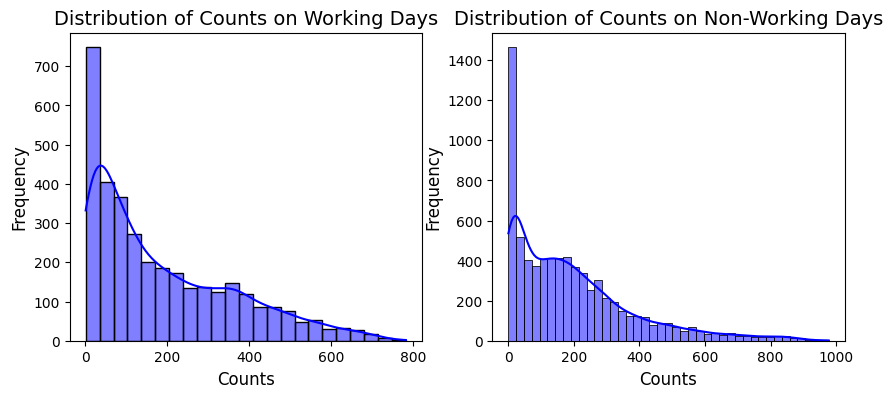

In [ ]:
#using histplot for checking normality of counts_on_working_days and non-working days

fig,axes=plt.subplots(1,2,figsize=(10,4))

# Plotting the histogram with KDE
sns.histplot(counts_on_working_days, kde=True, color='blue', edgecolor='black',ax=axes[0])

# Adding title and axis labels
axes[0].set_title('Distribution of Counts on Working Days', fontsize=14)
axes[0].set_xlabel('Counts', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

# Plotting the histogram with KDE
sns.histplot(counts_on_non_working_days, kde=True, color='blue', edgecolor='black',ax=axes[1])

# Adding title and axis labels
axes[1].set_title('Distribution of Counts on Non-Working Days', fontsize=14)
axes[1].set_xlabel('Counts', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)

# Displaying the plot
plt.show()

Looking at histplot, both the samples seem to have a right-skewed distribution.

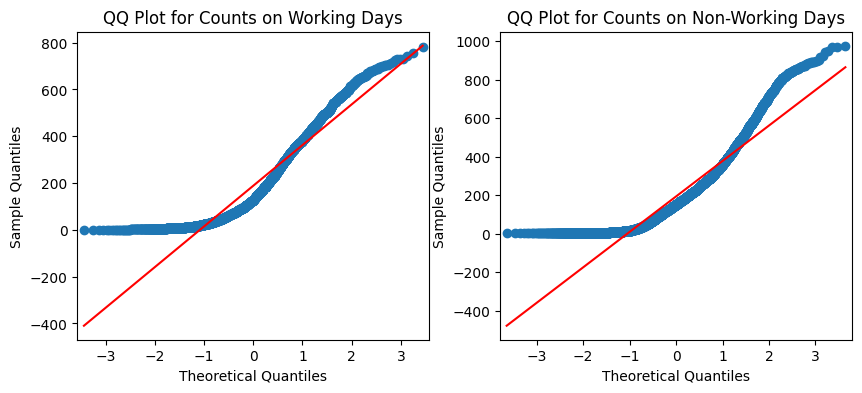

In [ ]:
#Normality test using qqplots for counts on working days and non-working days

fig,axes=plt.subplots(1,2,figsize=(10,4))

# Creating the QQ plot
sm.qqplot(counts_on_working_days, line='s',ax=axes[0])
axes[0].set_title('QQ Plot for Counts on Working Days')

# Creating the QQ plot
sm.qqplot(counts_on_non_working_days, line='s',ax=axes[1])
axes[1].set_title('QQ Plot for Counts on Non-Working Days')

# Displaying the plot
plt.show()

In [ ]:
#Normality check for counts on working days using shapiro test

#h0 : data is gaussian
#ha : data is not gaussian
#significance level = 0.05

shapiro(counts_on_working_days)

ShapiroResult(statistic=0.885211755076074, pvalue=4.4728547627911074e-45)

In [ ]:
#Normality check for counts on non working days using shapiro test

#h0 : data is gaussian
#ha : data is not gaussian
#significance level = 0.05

shapiro(counts_on_non_working_days)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7412.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=0.8702545795617624, pvalue=2.2521124830019574e-61)

##### Variance test for samples

In [ ]:
print('variance in sample for counts on working days is ',counts_on_working_days.var())
print('variance in sample for counts on non working days is ',counts_on_non_working_days.var())

variance in sample for counts on working days is  30180.033500640944
variance in sample for counts on non working days is  34045.29037312215


In [ ]:
# Variance test for both the test using levene test
levene(counts_on_working_days,counts_on_non_working_days)

LeveneResult(statistic=0.004972848886504472, pvalue=0.9437823280916695)

p-val > 0.05 ==> Variance is same. We do not reject Null Hypothesis.

#### Hypothesis Test

In [ ]:
#H0 : Means of both the samples count on working days and non working days are equal
#Ha : Means of both samples differ

ttest_ind(counts_on_working_days,counts_on_non_working_days)

TtestResult(statistic=-1.2096277376026694, pvalue=0.22644804226361348, df=10884.0)

As per p-val ==> pvalue=0.22644804226361348 > 0.05 , we fail to reject Null hypothesis. This shows that there is hardly any dependency of rented cycle counts type of day (working and non-working)

# 1-way ANNOVA Test

## Seasons have an effect on number of cycles rented

In [ ]:
#season
# 1: spring
# 2: summer
# 3: fall
# 4: winter

In [ ]:
df['season'].value_counts()

,count
season,
4,2734
2,2733
3,2733
1,2686


In [ ]:
#separate pandas series (for different seasons)
counts_in_spring=df[df['season']==1]['count']
counts_in_summer=df[df['season']==2]['count']
counts_in_fall=df[df['season']==3]['count']
counts_in_winter=df[df['season']==4]['count']


#### Check test assumptions

##### Normality check for both the samples

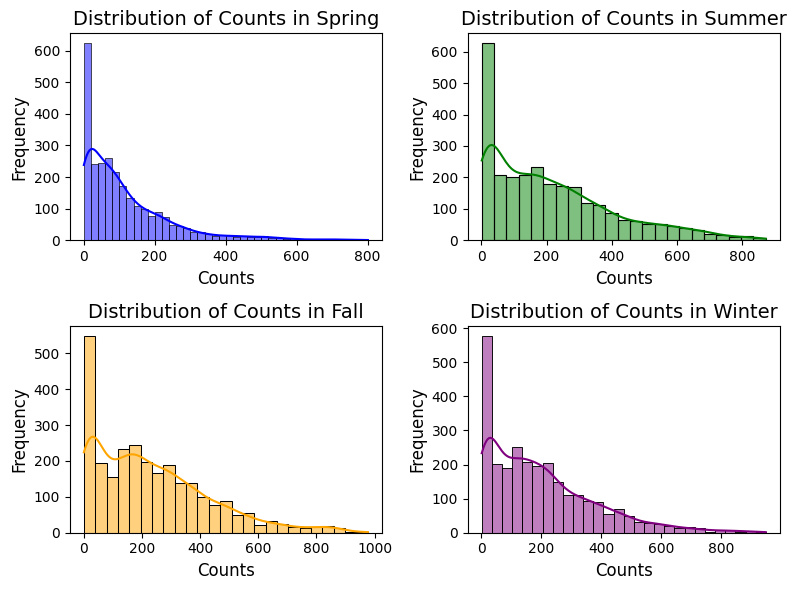

In [ ]:
#using histplot for checking normality of counts_in_spring

# Create a 2x2 grid for subplots
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

# Plotting histograms with KDE for each season
sns.histplot(counts_in_spring, kde=True, color='blue', edgecolor='black', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Counts in Spring', fontsize=14)
axes[0, 0].set_xlabel('Counts', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)

sns.histplot(counts_in_summer, kde=True, color='green', edgecolor='black', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Counts in Summer', fontsize=14)
axes[0, 1].set_xlabel('Counts', fontsize=12)
axes[0, 1].set_ylabel('Frequency', fontsize=12)

sns.histplot(counts_in_fall, kde=True, color='orange', edgecolor='black', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Counts in Fall', fontsize=14)
axes[1, 0].set_xlabel('Counts', fontsize=12)
axes[1, 0].set_ylabel('Frequency', fontsize=12)

sns.histplot(counts_in_winter, kde=True, color='purple', edgecolor='black', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Counts in Winter', fontsize=14)
axes[1, 1].set_xlabel('Counts', fontsize=12)
axes[1, 1].set_ylabel('Frequency', fontsize=12)

# Adjust layout for better readability
plt.tight_layout()
plt.show()

Looking at all 4 hist plots , all of them are right skewed.

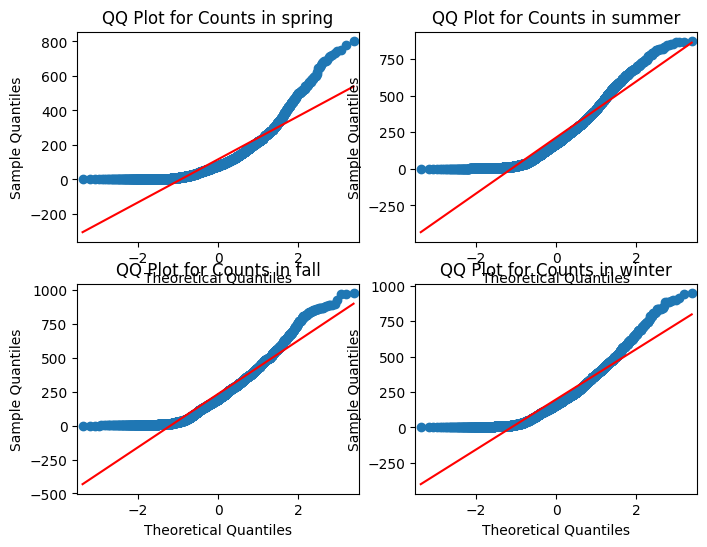

In [ ]:
#Normality test using qqplots for counts all 4 seasons

# create 2*2 grid for subplots
fig,axes= plt.subplots(2,2,figsize=(8,6))

# Creating the QQ plot
sm.qqplot(counts_in_spring, line='s',ax=axes[0,0])
axes[0,0].set_title('QQ Plot for Counts in spring')

sm.qqplot(counts_in_summer, line='s',ax=axes[0,1])
axes[0,1].set_title('QQ Plot for Counts in summer')

sm.qqplot(counts_in_fall, line='s',ax=axes[1,0])
axes[1,0].set_title('QQ Plot for Counts in fall')

sm.qqplot(counts_in_winter, line='s',ax=axes[1,1])
axes[1,1].set_title('QQ Plot for Counts in winter')


# Displaying the plot
plt.show()

In [ ]:
#Normality check for counts of different seasons using shapiro test

#h0 : data is gaussian
#ha : data is not gaussian
#significance level = 0.05

print('shapiro stats for spring',shapiro(counts_in_spring))
print('shapiro stats for summer',shapiro(counts_in_summer))
print('shapiro stats for fall',shapiro(counts_in_fall))
print('shapiro stats for winter',shapiro(counts_in_winter))


shapiro stats for spring ShapiroResult(statistic=0.8087378401253588, pvalue=8.749584618867662e-49)
shapiro stats for summer ShapiroResult(statistic=0.9004818080893252, pvalue=6.039374406270491e-39)
shapiro stats for fall ShapiroResult(statistic=0.9148166372899196, pvalue=1.043680518918597e-36)
shapiro stats for winter ShapiroResult(statistic=0.8954637482095505, pvalue=1.1299244409282836e-39)


All the above p-values are super less than 0.05 ==> samples are not following gausian distribustion.

##### Variance test for samples

In [ ]:
print('variance in sample for counts in spring ',counts_in_spring.var())
print('variance in sample for counts in spring ',counts_in_summer.var())
print('variance in sample for counts in spring ',counts_in_fall.var())
print('variance in sample for counts in spring ',counts_in_winter.var())

variance in sample for counts in spring  15693.56853371715
variance in sample for counts in spring  36867.01182553239
variance in sample for counts in spring  38868.5170126629
variance in sample for counts in spring  31549.720316669263


In [ ]:
# Variance test for all seasons using levene test

levene(counts_in_spring,counts_in_summer,counts_in_fall,counts_in_winter)

LeveneResult(statistic=187.7706624026276, pvalue=1.0147116860043298e-118)

Very low p-val pvalue=1.0147116860043298e-118 < 0.05 shows difference in variance.

#### Hypothesis Test

In [ ]:
#H0 : Means of all the counts across all four seasons are equal
#Ha : Means of samples differ and there is dependency of counts of rented bikes on season

f_oneway(counts_in_spring,counts_in_summer,counts_in_fall,counts_in_winter)

F_onewayResult(statistic=236.94671081032106, pvalue=6.164843386499654e-149)

pvalue=6.164843386499654e-149 << 0.05 ==> We successfully rejec our NULL hypothesis and we believe that there is dependency of counts of rented bikes on season

In [ ]:
#Since assumptions of normality and variance did not hold true , lets perform hypothesis test using kruskal test as well

kruskal(counts_in_spring,counts_in_summer,counts_in_fall,counts_in_winter)

KruskalResult(statistic=699.6668548181988, pvalue=2.479008372608633e-151)

here also pvalue=2.479008372608633e-151 , 0.05 , and hints in the same direction that we reject null hypothesis.

## Weather have an effect on number of cycles rented

In [ ]:
# weather:
# 1: Clear, Few clouds, partly cloudy, partly cloudy  : w1
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist : w2
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds :w3
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog : w4

In [ ]:
df['weather'].value_counts()

,count
weather,
1,7192
2,2834
3,859
4,1


In [ ]:
#separate pandas series (for different weathers)
counts_in_w1=df[df['weather']==1]['count']
counts_in_w2=df[df['weather']==2]['count']
counts_in_w3=df[df['weather']==3]['count']
counts_in_w4=df[df['weather']==4]['count']

#### Check test assumptions

##### Normality check for both the samples

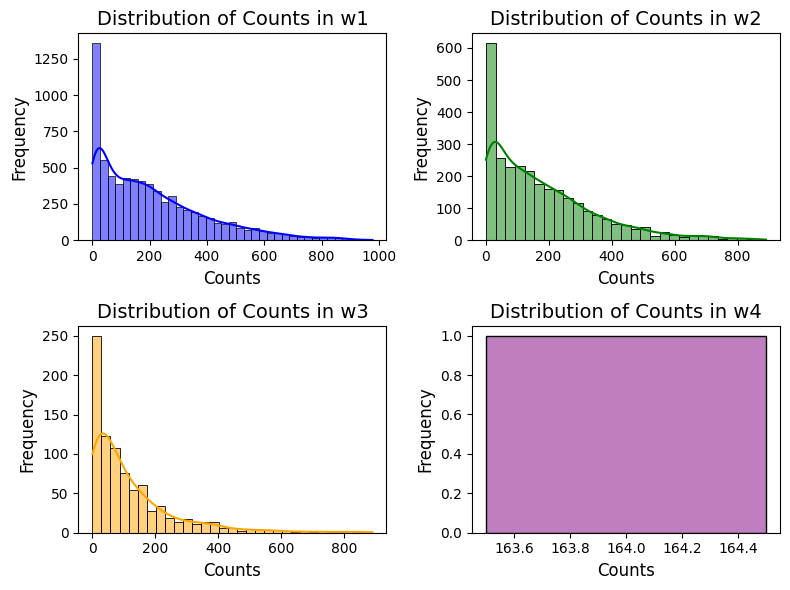

In [ ]:
#using histplot for checking normality of counts in different weathers

# Create a 2x2 grid for subplots
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

# Plotting histograms with KDE for each season
sns.histplot(counts_in_w1, kde=True, color='blue', edgecolor='black', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Counts in w1', fontsize=14)
axes[0, 0].set_xlabel('Counts', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)

sns.histplot(counts_in_w2, kde=True, color='green', edgecolor='black', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Counts in w2', fontsize=14)
axes[0, 1].set_xlabel('Counts', fontsize=12)
axes[0, 1].set_ylabel('Frequency', fontsize=12)

sns.histplot(counts_in_w3, kde=True, color='orange', edgecolor='black', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Counts in w3', fontsize=14)
axes[1, 0].set_xlabel('Counts', fontsize=12)
axes[1, 0].set_ylabel('Frequency', fontsize=12)

sns.histplot(counts_in_w4, kde=True, color='purple', edgecolor='black', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Counts in w4', fontsize=14)
axes[1, 1].set_xlabel('Counts', fontsize=12)
axes[1, 1].set_ylabel('Frequency', fontsize=12)

# Adjust layout for better readability
plt.tight_layout()
plt.show()

Looking at all 4 hist plots , all of them are right skewed.

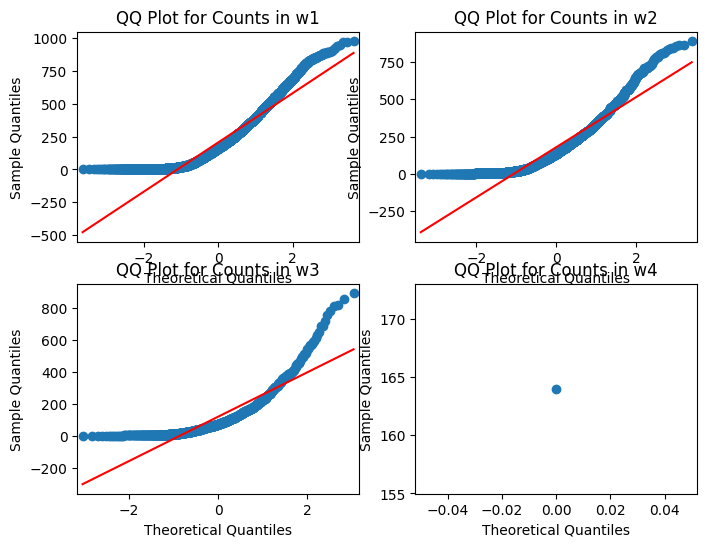

In [ ]:
#Normality test using qqplots for counts all 4 weather categories

# create 2*2 grid for subplots
fig,axes= plt.subplots(2,2,figsize=(8,6))

# Creating the QQ plot
sm.qqplot(counts_in_w1, line='s',ax=axes[0,0])
axes[0,0].set_title('QQ Plot for Counts in w1')

sm.qqplot(counts_in_w2, line='s',ax=axes[0,1])
axes[0,1].set_title('QQ Plot for Counts in w2')

sm.qqplot(counts_in_w3, line='s',ax=axes[1,0])
axes[1,0].set_title('QQ Plot for Counts in w3')

sm.qqplot(counts_in_w4, line='s',ax=axes[1,1])
axes[1,1].set_title('QQ Plot for Counts in w4')


# Displaying the plot
plt.show()

In [ ]:
#Normality check for counts of different weathers using shapiro test

#h0 : data is gaussian
#ha : data is not gaussian
#significance level = 0.05

print('shapiro stats for w1',shapiro(counts_in_w1))
print('shapiro stats for w2',shapiro(counts_in_w2))
print('shapiro stats for w3',shapiro(counts_in_w3))

# Normality cant be checked for w4 as we have only one value in sample w4

shapiro stats for w1 ShapiroResult(statistic=0.8909259459740138, pvalue=1.5964921477006555e-57)
shapiro stats for w2 ShapiroResult(statistic=0.8767694973495206, pvalue=9.777839106111785e-43)
shapiro stats for w3 ShapiroResult(statistic=0.7674327906035717, pvalue=3.875893017396149e-33)


All the above p-values are super less than 0.05 ==> samples are not following gausian distribustion

##### Variance test for samples

In [ ]:
print('variance in sample for counts in spring ',counts_in_w1.var())
print('variance in sample for counts in spring ',counts_in_w2.var())
print('variance in sample for counts in spring ',counts_in_w3.var())
print('variance in sample for counts in spring ',counts_in_w4.var())

variance in sample for counts in spring  35328.79846268019
variance in sample for counts in spring  28347.248993301808
variance in sample for counts in spring  19204.775892714213
variance in sample for counts in spring  nan


In [ ]:
# Variance test for all seasons using levene test

levene(counts_in_w1,counts_in_w2,counts_in_w3,counts_in_w4)

LeveneResult(statistic=54.85106195954556, pvalue=3.504937946833238e-35)

Very low pvalue=3.504937946833238e-35 < 0.05 shows difference in variance.

#### Hypothesis Test

In [ ]:
#H0 : Means of all the counts across all four weathers are equal
#Ha : Means of samples differ and there is dependency of counts of rented bikes on weathers

f_oneway(counts_in_w1,counts_in_w2,counts_in_w3,counts_in_w4)

F_onewayResult(statistic=65.53024112793271, pvalue=5.482069475935669e-42)

pvalue=5.482069475935669e-42 << 0.05 ==> We successfully reject our NULL hypothesis and we believe that there is dependency of counts of rented bikes on different weathers.

In [ ]:
#Since assumptions of normality and variance did not hold true , lets perform hypothesis test using kruskal test as well

kruskal(counts_in_w1,counts_in_w2,counts_in_w3,counts_in_w4)

KruskalResult(statistic=205.00216514479087, pvalue=3.501611300708679e-44)

Here also pvalue=3.501611300708679e-44 << 0.05 and hints in the same direction that we should reject null hypothesis.

# Chi-Square Test

## Weather is dependent on season (check between 2 predictor variable)

In [ ]:
#Hypothesis
# categorical vs categorical (season vs weather)
# H0 : There is no relationship between seasons and weathers
# Ha : There is relationship between seasons and wathers.

In [ ]:
season_weather=pd.crosstab(index=df['season'],columns=df['weather'])
season_weather

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [ ]:
chi2_contingency(season_weather)

Chi2ContingencyResult(statistic=49.158655596893624, pvalue=1.549925073686492e-07, dof=9, expected_freq=array([[1.77454639e+03, 6.99258130e+02, 2.11948742e+02, 2.46738931e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80625831e+03, 7.11754180e+02, 2.15736359e+02, 2.51148264e-01]]))

Looking at pvalue=1.549925073686492e-07 << 0.05 , we may comment that there is a significant relationship between season and weather and hence we reject our Null Hypothesis.